In [147]:
import pandas as pd

total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


1. ici on ameliore notre modele. on selectionne un vecteur d'amenites, et pour ce faire, on fait une regression lasso. on ajoute ce vecteur d'amenite a notre premiere regression dans 3_reg_and_test. En prédisant les depenses en logement avec des amenités (qui expliquent une demande pour le logement), on isole l'effet de la variable catégorielle territoire et on réduit la surestimation de ses coefficients. 

3. Ensuite, on essaie d'expliquer comme prevu, les raisons d'un pluricentrisme à Bogota. Ici, on utilisera la variable Utilrank. On va tout d'abord utiliser un SVM pour capter le plus de son pouvoir explicatif sur les amenites, afin que l'interpretation d'Utilrank ne concerne que l'interaction territoire et richesse individuelle. Ainsi, on pourra voir 

1. Lasso, selection d'un vecteur de variables d'amenités 

In [212]:
#Numrooms+ C(territory)+ C(level_educ)+ age+ C(marital_status)+ gender+own_status

variables = ['Numrooms', 'Numroomsleep', 'Sanserv1', 'Sanserv2', 'Garbdisp', 'Watserv', 'Kitchen', 'Fuelc',
             'Phone_service', 'tvservice', 'Internet_service', 'Washing', 'Refrigerator', 'Blender', 'Stove',
             'Oven', 'Microwave', 'Water_heater', 'ColorTV', 'Computer', 'AirCond', 'typeofbuilding', 'Stereo',
             'Floor', 'Wallsmaterial','Garbcollectfreq','Dummyelec',
             'Utilrank', 'Naturalgas', 'Sewage_system', 'Garbcollect', 'Aqueduct', 'Frequencewat']


In [118]:

########## cherchons les variables qui demandent un preprocessing, et on voit si elle est categorielle ou continue 

#value_counts_dict = {} #si on veut les value counts
value_counts_dict = []

# Filter variables with more than two unique values
for col in variables:
    unique_values_count = total_dataset_clean[col].nunique()
    if unique_values_count and col not in ['Numrooms', 'Numroomsleep']:
        #value_counts_dict[col] = total_dataset_clean[col].value_counts()   #pour avoir le compte. on a juste besoin du nom des vars 
        value_counts_dict.append(col)

# Display the names of variables with more than two unique values
print("Variables categorielles et continues à preprocesser:")
print(value_counts_dict)

# si on veut les value counts: 
#for col, counts in value_counts_dict.items():
#    print(f"Value counts for {col}:\n{counts}\n")
['Numrooms', 'Numroomsleep']
['Numrooms', 'Numroomsleep', 'Sanserv1', 'Garbdisp', 'Watserv', 'Kitchen', 'Fuelc', 'Floor', 'Wallsmaterial', 'Garbcollectfreq', 'Utilrank', 'Frequencewat']

Variables categorielles et continues à preprocesser:
['Sanserv1', 'Sanserv2', 'Garbdisp', 'Watserv', 'Kitchen', 'Fuelc', 'Phone_service', 'tvservice', 'Internet_service', 'Washing', 'Refrigerator', 'Blender', 'Stove', 'Oven', 'Microwave', 'Water_heater', 'ColorTV', 'Computer', 'AirCond', 'typeofbuilding', 'Stereo', 'Floor', 'Wallsmaterial', 'Garbcollectfreq', 'Dummyelec', 'Utilrank', 'Naturalgas', 'Sewage_system', 'Garbcollect', 'Aqueduct', 'Frequencewat']


['Numrooms',
 'Numroomsleep',
 'Sanserv1',
 'Garbdisp',
 'Watserv',
 'Kitchen',
 'Fuelc',
 'Floor',
 'Wallsmaterial',
 'Garbcollectfreq',
 'Utilrank',
 'Frequencewat']

In [202]:
# j'ai mes variables categorielles sous forme dummy ok 

data = total_dataset_clean[value_counts_dict]

for column in value_counts_dict:
    # Create dummies and concatenate them to the original DataFrame
    dummies = pd.get_dummies(data[column], prefix=column, dtype=float, drop_first=True)
    data = pd.concat([data, dummies], axis=1)

# Drop the original categorical columns
data = data.drop(value_counts_dict, axis=1)




# Normalize continuous variables between 0 and 1
    scaler = MinMaxScaler()
    data_preprocess = total_dataset_clean[['Numrooms', 'Numroomsleep']] 
    data_preprocess= scaler.fit_transform(data_preprocess[['Numrooms', 'Numroomsleep']])


In [203]:
data

,Sanserv1_1.0,Sanserv1_2.0,Sanserv2_2.0,Sanserv2_missing,Garbdisp_2.0,Garbdisp_3.0,Garbdisp_4.0,Garbdisp_5.0,Watserv_2.0,Watserv_3.0,...,Utilrank_4.0,Utilrank_5.0,Utilrank_6.0,Utilrank_9.0,Naturalgas_2.0,Sewage_system_2.0,Garbcollect_2.0,Aqueduct_2.0,Frequencewat_1.0,Frequencewat_2.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18136,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
18137,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [213]:
other_dummies = list(set(variables) - set(value_counts_dict))

In [214]:
other_dummies

['Numroomsleep', 'Numrooms']

In [215]:

X = pd.concat([data, data_preprocess], axis=1)
y = total_dataset_clean['log_imputed_rent_uc']

#clean avant de lancer le lasso 
X_y = pd.concat([X,y],axis=1)
X_y = X_y.dropna()

y = X_y['log_imputed_rent_uc']
X = X_y.drop('log_imputed_rent_uc', axis=1)




In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [218]:
#cross validation pour determiner le alpha optimal 

from sklearn.linear_model import LassoCV

# Create a LassoCV model with cross-validation
lasso_model = LassoCV(alphas=np.logspace(-15, 15, 200), cv=5, max_iter=10000)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.0522609219429, tolerance: 0.5743077631847101
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 771.8599026805217, tolerance: 0.5743077631847101
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013.401344023317, tolerance: 0.5743077631847101
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: Convergence

LassoCV(alphas=array([1.00000000e-15, 1.41499130e-15, 2.00220037e-15, 2.83309610e-15,
       4.00880633e-15, 5.67242607e-15, 8.02643352e-15, 1.13573336e-14,
       1.60705282e-14, 2.27396575e-14, 3.21764175e-14, 4.55293507e-14,
       6.44236351e-14, 9.11588830e-14, 1.28989026e-13, 1.82518349e-13,
       2.58261876e-13, 3.65438307e-13, 5.17092024e-13, 7.31680714e-13,
       1.03532184e-12, 1.46497140e-1...
       3.40928507e+11, 4.82410870e+11, 6.82607183e+11, 9.65883224e+11,
       1.36671636e+12, 1.93389175e+12, 2.73644000e+12, 3.87203878e+12,
       5.47890118e+12, 7.75259749e+12, 1.09698580e+13, 1.55222536e+13,
       2.19638537e+13, 3.10786619e+13, 4.39760361e+13, 6.22257084e+13,
       8.80488358e+13, 1.24588336e+14, 1.76291412e+14, 2.49450814e+14,
       3.52970730e+14, 4.99450512e+14, 7.06718127e+14, 1.00000000e+15]),
        cv=5, max_iter=10000)

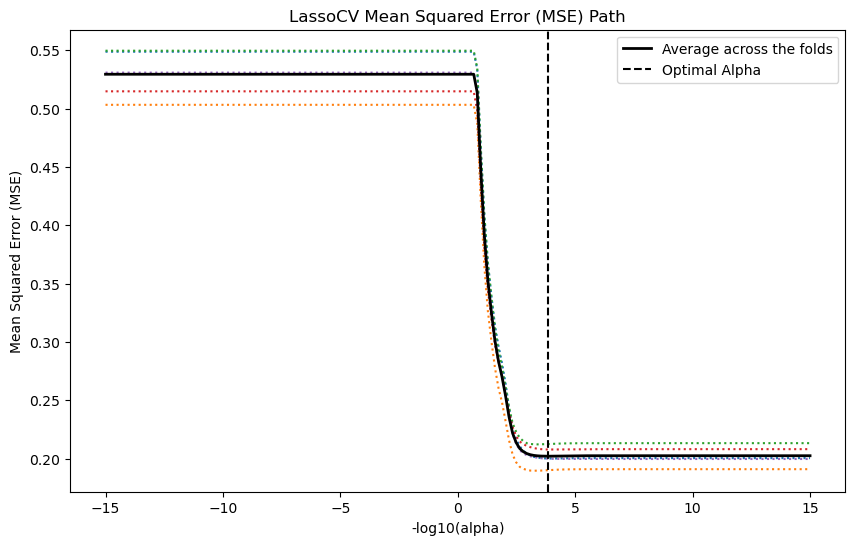

In [219]:
# Plot the results
m_log_alphas = -np.log10(lasso_model.alphas_)

plt.figure(figsize=(10, 6))
plt.plot(m_log_alphas, lasso_model.mse_path_, ':')
plt.plot(m_log_alphas, lasso_model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_model.alpha_), linestyle='--', color='k', label='Optimal Alpha')

plt.legend()
plt.xlabel('-log10(alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('LassoCV Mean Squared Error (MSE) Path')
plt.show() 

In [220]:
test_score = lasso_model.score(X_test, y_test)
test_score # R-squared (coefficient of determination) score on the test set

0.5916552082789241

In [221]:
optimal_alpha = lasso_model.alpha_
optimal_alpha_original_scale = 10**optimal_alpha
optimal_alpha_original_scale

1.0003296599269722

In [187]:
data_preprocess
data_preprocess[['Numrooms', 'Numroomsleep']]

,Numrooms,Numroomsleep,Sanserv2_1.0,Sanserv2_2.0,Sanserv2_missing,Fuelc_1.0,Fuelc_2.0,Fuelc_3.0,Fuelc_4.0,Fuelc_5.0,Fuelc_6.0,Fuelc_7.0,Fuelc_missing
0,0.272727,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.454545,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.272727,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,0.090909,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18135,0.090909,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18136,0.272727,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18137,0.181818,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [194]:
#preprocessing 

y = total_dataset_clean['log_imputed_rent_uc']

#clean avant de lancer le lasso 
X_y = pd.concat([data_preprocess,y],axis=1)
X_y = X_y.dropna()
X_y
y = X_y['log_imputed_rent_uc']
X = X_y.drop('log_imputed_rent_uc', axis=1)


In [195]:
X

,Numrooms,Numroomsleep,Sanserv2_1.0,Sanserv2_2.0,Sanserv2_missing,Fuelc_1.0,Fuelc_2.0,Fuelc_3.0,Fuelc_4.0,Fuelc_5.0,Fuelc_6.0,Fuelc_7.0,Fuelc_missing
0,0.272727,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.454545,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.272727,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,0.090909,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18135,0.090909,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18136,0.272727,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18137,0.181818,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#on reprend

In [241]:
test_score = lasso_model.score(X_test, y_test)
test_score # R-squared (coefficient of determination) score on the test set

0.5916552082789241

In [240]:
optimal_alpha = lasso_model.alpha_
optimal_alpha_original_scale = 10**optimal_alpha
optimal_alpha_original_scale

1.0003296599269722

In [270]:
from sklearn.linear_model import Lasso

# Create a Lasso model with the optimal alpha
lasso_final = Lasso(alpha=optimal_alpha)

# Fit the model on the entire training data
lasso_final.fit(X_train, y_train)

Lasso(alpha=0.00014314589375234756)

In [269]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = lasso_final.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
coefficients = lasso_final.coef_


Mean Squared Error: 0.5336369494329645
R-squared: -1.2561009709921578e-05


In [251]:
pd.set_option('display.max_columns', None) #on veut voir toutes les colonnes de la base
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_model.coef_})
coefficients_df.T

to_exclude = coefficients_df[coefficients_df['Coefficient'].abs()==0]
to_exclude.T
to_exclude = [element.split('_')[0] for element in to_exclude['Variable']]
to_exclude = list(set(to_exclude))
to_exclude

['Aqueduct',
 'ColorTV',
 'Garbdisp',
 'Watserv',
 'Sanserv1',
 'Stove',
 'Wallsmaterial',
 'Fuelc',
 'Floor',
 'Naturalgas',
 'Sanserv2']

In [252]:
others = coefficients_df[coefficients_df['Coefficient'].abs()!=0]
others.T
others = [element.split('_')[0] for element in others['Variable']]
others = list(set(others))
others

['AirCond',
 'tvservice',
 'Computer',
 'Floor',
 'Stereo',
 'Numroomsleep',
 'Washing',
 'Internet',
 'typeofbuilding',
 'Numrooms',
 'Garbdisp',
 'Garbcollectfreq',
 'Watserv',
 'Sanserv1',
 'Microwave',
 'Garbcollect',
 'Fuelc',
 'Oven',
 'Blender',
 'Sanserv2',
 'Phone',
 'Dummyelec',
 'Water',
 'Wallsmaterial',
 'Refrigerator',
 'Kitchen',
 'Utilrank',
 'Sewage',
 'Frequencewat']

In [253]:
features = list(set(others)-set(to_exclude))
features #le vecteur d'amenites qu'on retient donc

['AirCond',
 'tvservice',
 'Computer',
 'Stereo',
 'Numroomsleep',
 'Washing',
 'Internet',
 'typeofbuilding',
 'Numrooms',
 'Garbcollectfreq',
 'Microwave',
 'Garbcollect',
 'Oven',
 'Blender',
 'Phone',
 'Dummyelec',
 'Water',
 'Refrigerator',
 'Kitchen',
 'Utilrank',
 'Sewage',
 'Frequencewat']

si le coefficient d'une dummy représentant une catégorie spécifique d'une variable catégorielle est exactement 0 dans la regularisation Lasso, on peut exclure non seulement cette dummy, mais aussi les autres dummies associees a la meme variable categorielle.

La régularisation Lasso tend à pousser certains coefficients a etre exactement 0, cela signifie que la categorie particuliere et ses dummies associees ne contribuent pas au modele selon la regularisation. En excluant les dummies associees a cette meme variable categorielle, on evite des problemes de multicollinearite et on simplifie le modele pour eviter l'overfit


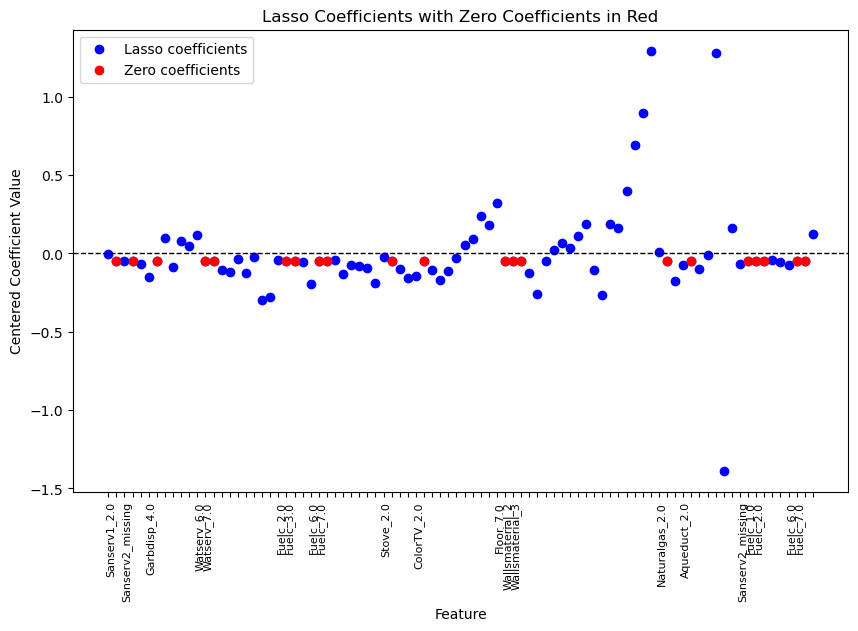

In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Centering the x-axis at y=0
centered_coefs = lasso_model.coef_ - np.mean(lasso_model.coef_)

# Create a mask for coefficients equal to 0
zero_coef_mask = np.isclose(lasso_model.coef_, 0)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(lasso_model.coef_)), centered_coefs, color='b', label='Lasso coefficients')
plt.scatter(np.arange(len(lasso_model.coef_))[zero_coef_mask], centered_coefs[zero_coef_mask], color='red', label='Zero coefficients')

# Adding labels to the x-axis

x_labels = [label if mask else "" for label, mask in zip(X.columns, zero_coef_mask)]
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=90, ha="right", fontsize=8)

# Adding labels and title
plt.xlabel('Feature')
plt.ylabel('Centered Coefficient Value')
plt.title('Lasso Coefficients with Zero Coefficients in Red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.legend()
plt.show()

In [265]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.21790513186239702
R-squared: 0.5916552082789241


In [ ]:
#et si j'ajoutais ? 

In [271]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=optimal_alpha)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[lasso_model.coef_ != 0]

# Apply the model to the test set
y_pred = lasso_model.predict(X_test)


In [272]:
selected_features

Index(['Sanserv1_1.0', 'Sanserv2_2.0', 'Garbdisp_2.0', 'Garbdisp_3.0',
       'Garbdisp_5.0', 'Watserv_2.0', 'Watserv_3.0', 'Watserv_4.0',
       'Watserv_5.0', 'Watserv_8.0', 'Watserv_9.0', 'Watserv_10.0',
       'Kitchen_2.0', 'Kitchen_3.0', 'Kitchen_4.0', 'Kitchen_5.0',
       'Kitchen_6.0', 'Fuelc_4.0', 'Fuelc_5.0', 'Fuelc_missing',
       'Phone_service_2.0', 'tvservice_2.0', 'Internet_service_2.0',
       'Washing_2.0', 'Refrigerator_2.0', 'Blender_2.0', 'Oven_2.0',
       'Microwave_2.0', 'Water_heater_2.0', 'Computer_2.0', 'AirCond_2.0',
       'typeofbuilding_2.0', 'Stereo_2.0', 'Floor_2.0', 'Floor_3.0',
       'Floor_4.0', 'Floor_5.0', 'Floor_6.0', 'Wallsmaterial_4',
       'Wallsmaterial_5', 'Wallsmaterial_6', 'Wallsmaterial_7',
       'Wallsmaterial_8', 'Garbcollectfreq_2.0', 'Garbcollectfreq_3.0',
       'Garbcollectfreq_4.0', 'Garbcollectfreq_5.0', 'Garbcollectfreq_6.0',
       'Dummyelec_2.0', 'Utilrank_2.0', 'Utilrank_3.0', 'Utilrank_4.0',
       'Utilrank_5.0', 'Utilra

In [273]:
y_pred

array([12.41126285, 12.10439377, 12.27158947, ..., 11.50670435,
       12.17416798, 12.79841436])

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')  # Using negative mean squared error as a scoring metric


In [275]:
scores

array([-2.17773114e-01, -2.02382664e-01, -1.99884710e-01, -2.10808359e-01,
       -1.26393747e+18])

In [282]:
replacement_dict = {'Internet': 'Internet_service', 'Phone': 'Phone_service', 'Water': 'Water_heater', 'Sewage': 'Sewage_system'}

# Perform the replacement
features = [replacement_dict.get(col, col) for col in features]

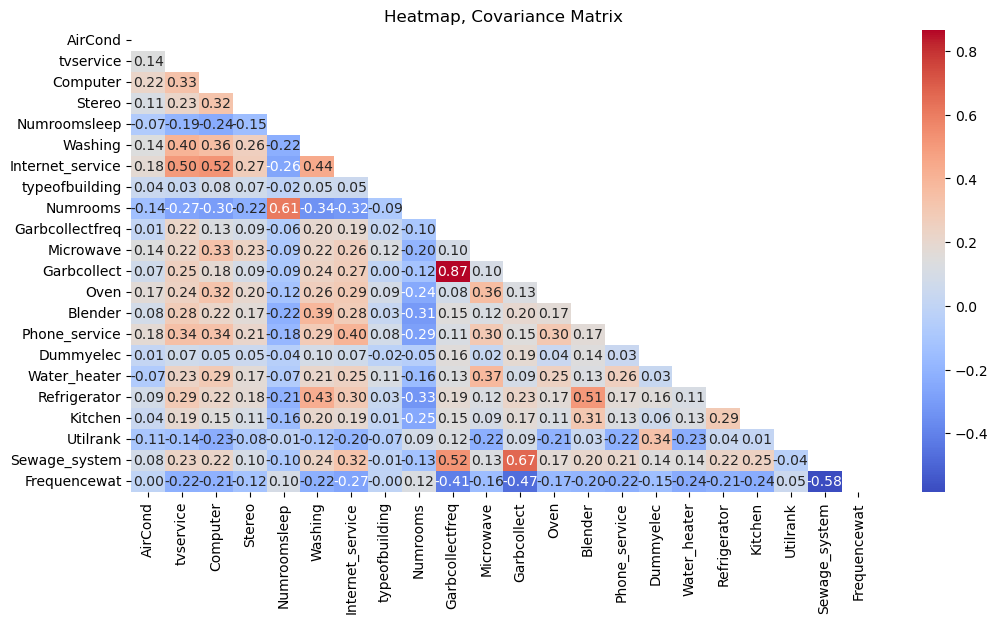

In [291]:
import seaborn as sns
ok = total_dataset_clean[features].corr()
mask = np.triu(np.ones_like(ok, dtype=bool))
plt.figure(figsize=(12, 6))
sns.heatmap(ok, mask=mask, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Heatmap, Covariance Matrix')
plt.show()

In [293]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming total_dataset_clean is your DataFrame with the selected features
data_for_vif = total_dataset_clean[features].copy()

# Handle missing values (if any)
data_for_vif.dropna(inplace=True)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_for_vif.values, i) for i in range(data_for_vif.shape[1])]
vif_data

,Variable,VIF
0,AirCond,71.995693
1,tvservice,13.819184
2,Computer,23.399445
3,Stereo,17.627510
4,Numroomsleep,10.113726
5,Washing,14.204439
6,Internet_service,17.984179
7,typeofbuilding,154.234152
8,Numrooms,18.283432
9,Garbcollectfreq,43.686724


typeofbuilding, Dummyelec, Microwave, Garbcollect, Oven, Phone_service, Water_heater, Sewage_system ont un VIF particulierement eleves. donc probleme de multicollinearite avec d'autres variables (Garbcollect avec Garbcollectfreq; dummyelec avec utilrank...) 
On garde le reste et ils constituent notre vecteur d'amenités 

In [329]:
high_vif_variables = ['AirCond','typeofbuilding', 'Dummyelec', 'Microwave', 'Garbcollect', 'Oven', 'Phone_service', 'Water_heater']

# Remove high VIF variables
features_after_removal = [var for var in features if var not in high_vif_variables]

# Create a new DataFrame with the remaining variables
data_after_removal = total_dataset_clean[features_after_removal].copy()

# Handle missing values (if any)
data_after_removal.dropna(inplace=True)

# Calculate VIF for the remaining variables
vif_data_after_removal = pd.DataFrame()
vif_data_after_removal["Variable"] = data_after_removal.columns
vif_data_after_removal["VIF"] = [variance_inflation_factor(data_after_removal.values, i) for i in range(data_after_removal.shape[1])]
vif_data_after_removal

,Variable,VIF
0,tvservice,13.367365
1,Computer,20.568793
2,Stereo,16.148889
3,Numroomsleep,9.930706
4,Washing,14.060533
5,Internet_service,17.478382
6,Numrooms,15.807926
7,Garbcollectfreq,14.702122
8,Blender,17.672923
9,Refrigerator,19.101712


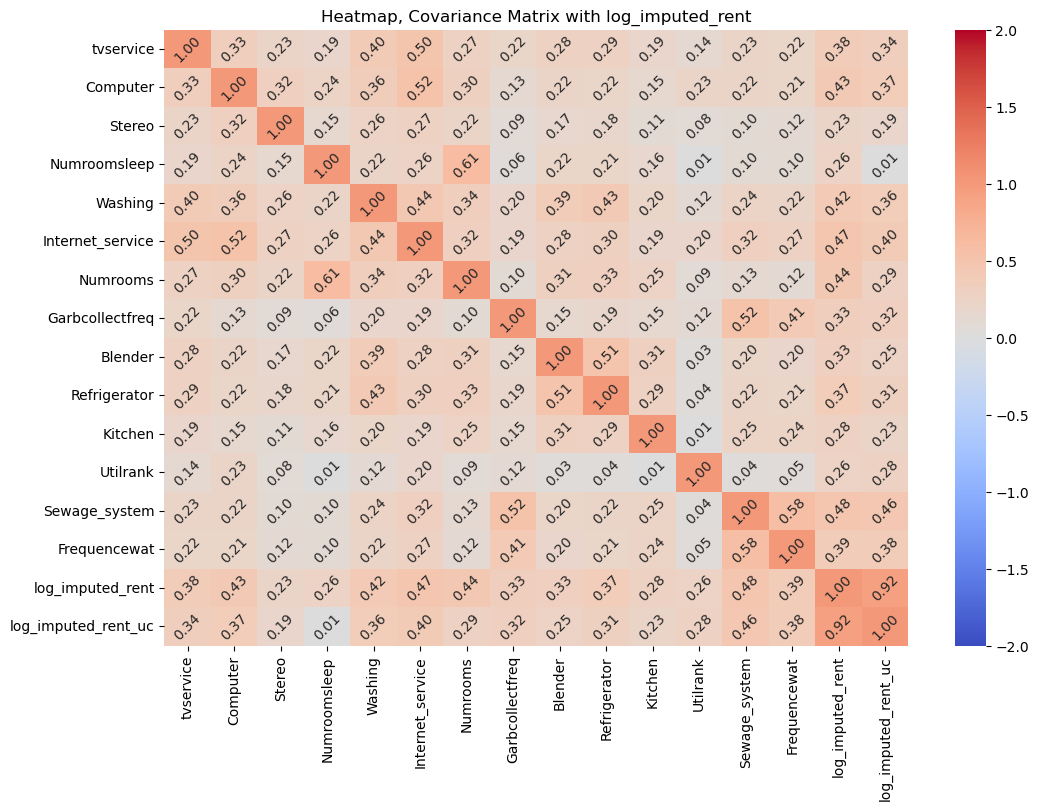

In [330]:
import seaborn as sns
import numpy as np
import pandas as pd

# Select the remaining variables (excluding log_imputed_rent) based on VIF results
selected_variables_after_removal = vif_data_after_removal["Variable"].tolist() + ["log_imputed_rent"]+ ["log_imputed_rent_uc"]

# Extract the selected data from total_dataset_clean (including log_imputed_rent)
data_for_heatmap = total_dataset_clean[selected_variables_after_removal]

# Calculate the covariance matrix
corr_matrix = data_for_heatmap.corr().abs()

# Create a DataFrame from the covariance matrix
corr_df = pd.DataFrame(corr_matrix, columns=data_for_heatmap.columns, index=data_for_heatmap.columns)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt='.2f', annot_kws={'rotation': 45}, vmin=-2, vmax=2)

# Set the title
plt.title('Heatmap, Covariance Matrix with log_imputed_rent')

# Show the plot
plt.show()

In [332]:
selected_variables_after_removal = vif_data_after_removal["Variable"].tolist()
selected_variables_after_removal = [var for var in selected_variables_after_removal if var != "Numroomsleep"]
selected_variables_after_removal

['tvservice',
 'Computer',
 'Stereo',
 'Washing',
 'Internet_service',
 'Numrooms',
 'Garbcollectfreq',
 'Blender',
 'Refrigerator',
 'Kitchen',
 'Utilrank',
 'Sewage_system',
 'Frequencewat']

In [333]:
data_for_vif_after_removal = total_dataset_clean[selected_variables_after_removal]

# Calculate VIF for the remaining variables
vif_data_after_removal = pd.DataFrame()
vif_data_after_removal["Variable"] = data_for_vif_after_removal.columns
vif_data_after_removal["VIF"] = [variance_inflation_factor(data_for_vif_after_removal.values, i) for i in range(data_for_vif_after_removal.shape[1])]
vif_data_after_removal

,Variable,VIF
0,tvservice,13.367322
1,Computer,20.541818
2,Stereo,16.124568
3,Washing,14.055146
4,Internet_service,17.407129
5,Numrooms,9.093131
6,Garbcollectfreq,14.659813
7,Blender,17.672750
8,Refrigerator,19.075802
9,Kitchen,3.344783


In [337]:
#on relance un lasso avec cet echantillon reduit 

from sklearn.linear_model import Lasso

X_bis = total_dataset_clean[vif_data_after_removal["Variable"].tolist()]
X_y_bis = pd.concat([X_bis,y],axis=1)
X_y_bis = X_y_bis.dropna()
X_y_bis
X_bis = pd.concat([X_y_bis[vif_data_after_removal["Variable"].tolist()]])
y_bis = X_y_bis['log_imputed_rent_uc']

In [401]:
#preprocessing
data=X_bis

variables_left = vif_data_after_removal["Variable"].tolist()
if "Numrooms" in variables_left:
    variables_left.remove("Numrooms")

variables_left

['tvservice',
 'Computer',
 'Stereo',
 'Washing',
 'Internet_service',
 'Garbcollectfreq',
 'Blender',
 'Refrigerator',
 'Kitchen',
 'Utilrank',
 'Sewage_system',
 'Frequencewat']

In [402]:
data = data[variables_left]

In [403]:
for column in variables_left:
    # Create dummies and concatenate them to the original DataFrame
    dummies = pd.get_dummies(data[column], prefix=column, dtype=float, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
data = data.drop(variables_left, axis=1)

In [404]:
data

,tvservice_2.0,Computer_2.0,Stereo_2.0,Washing_2.0,Internet_service_2.0,Garbcollectfreq_2.0,Garbcollectfreq_3.0,Garbcollectfreq_4.0,Garbcollectfreq_5.0,Garbcollectfreq_6.0,Blender_2.0,Refrigerator_2.0,Kitchen_2.0,Kitchen_3.0,Kitchen_4.0,Kitchen_5.0,Kitchen_6.0,Utilrank_2.0,Utilrank_3.0,Utilrank_4.0,Utilrank_5.0,Utilrank_6.0,Utilrank_9.0,Sewage_system_2.0,Frequencewat_1.0,Frequencewat_2.0
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18135,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
18136,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18137,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [406]:

scaler = MinMaxScaler()
data_preprocess = scaler.fit_transform(total_dataset_clean['Numrooms'].array.reshape(-1, 1)) 
data_preprocess = pd.DataFrame(data_preprocess, columns=['Numrooms'])
data_preprocess

,Numrooms
0,0.272727
1,0.454545
2,0.272727
3,0.272727
4,0.272727
...,...
18134,0.090909
18135,0.090909
18136,0.272727
18137,0.181818


In [408]:

X_bisbis = pd.concat([data, data_preprocess], axis=1)
X_ybis = pd.concat([X_bisbis,y_bis],axis=1)
X_ybis = X_ybis.dropna()
X_ybis
yb = X_ybis['log_imputed_rent_uc']
Xb = X_ybis.drop(['log_imputed_rent_uc'], axis=1)

Xb

,tvservice_2.0,Computer_2.0,Stereo_2.0,Washing_2.0,Internet_service_2.0,Garbcollectfreq_2.0,Garbcollectfreq_3.0,Garbcollectfreq_4.0,Garbcollectfreq_5.0,Garbcollectfreq_6.0,Blender_2.0,Refrigerator_2.0,Kitchen_2.0,Kitchen_3.0,Kitchen_4.0,Kitchen_5.0,Kitchen_6.0,Utilrank_2.0,Utilrank_3.0,Utilrank_4.0,Utilrank_5.0,Utilrank_6.0,Utilrank_9.0,Sewage_system_2.0,Frequencewat_1.0,Frequencewat_2.0,Numrooms
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272727
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.454545
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272727
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272727
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.090909
18135,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909
18136,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.272727
18137,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.181818


In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xb, yb, test_size=0.2, random_state=42)


In [ ]:
#cross validation pour determiner le alpha optimal 

from sklearn.linear_model import LassoCV

# Create a LassoCV model with cross-validation
lasso_model2 = LassoCV(alphas=np.logspace(-25, 15, 200), cv=5, max_iter=20)

# Fit the model on the training data
lasso_model2.fit(X_train2, y_train2)

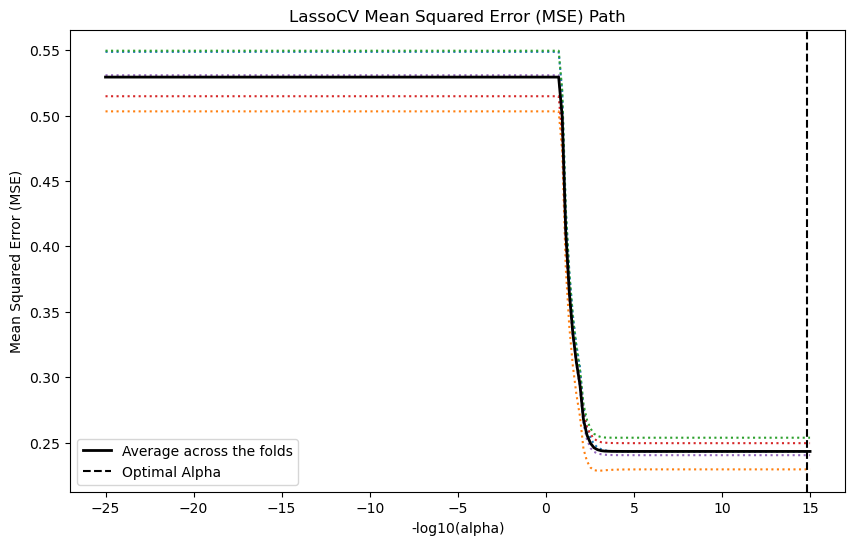

In [416]:
# Plot the results
m_log_alphas = -np.log10(lasso_model2.alphas_)

plt.figure(figsize=(10, 6))
plt.plot(m_log_alphas, lasso_model2.mse_path_, ':')
plt.plot(m_log_alphas, lasso_model2.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_model2.alpha_), linestyle='--', color='k', label='Optimal Alpha')

plt.legend()
plt.xlabel('-log10(alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('LassoCV Mean Squared Error (MSE) Path')
plt.show() 

In [373]:
test_score = lasso_model2.score(X_test2, y_test2)
test_score # plus faible, c'est normal. on a moins de covariables

0.5102079486278095

In [374]:
optimal_alpha2 = lasso_model2.alpha_
optimal_alpha_original_scale2 = 10**optimal_alpha2
optimal_alpha_original_scale2

1.0003296599269722

In [375]:
lasso_model2_selec = Lasso(alpha=optimal_alpha2)  # Adjust alpha for regularization strength
lasso_model2_selec.fit(X_train2, y_train2)

# Get the selected features
selected_features2 = X_train2.columns[lasso_model2_selec.coef_ != 0]

# Apply the model to the test set
y_pred = lasso_model2_selec.predict(X_test2)

In [378]:
selected_features2

Index(['tvservice_2.0', 'Computer_2.0', 'Stereo_2.0', 'Washing_2.0',
       'Internet_service_2.0', 'Numrooms_2.0', 'Numrooms_3.0', 'Numrooms_5.0',
       'Numrooms_6.0', 'Numrooms_7.0', 'Garbcollectfreq_2.0',
       'Garbcollectfreq_3.0', 'Garbcollectfreq_4.0', 'Garbcollectfreq_5.0',
       'Garbcollectfreq_6.0', 'Blender_2.0', 'Refrigerator_2.0', 'Kitchen_2.0',
       'Kitchen_3.0', 'Kitchen_4.0', 'Kitchen_5.0', 'Kitchen_6.0',
       'Utilrank_2.0', 'Utilrank_3.0', 'Utilrank_4.0', 'Utilrank_5.0',
       'Utilrank_6.0', 'Utilrank_9.0', 'Sewage_system_2.0', 'Frequencewat_1.0',
       'Frequencewat_2.0', 'log_imputed_rent'],
      dtype='object')

In [381]:
coefficients_df2 = pd.DataFrame({'Variable': Xb.columns, 'Coefficient': lasso_model2_selec.coef_})
coefficients_df2

,Variable,Coefficient
0,tvservice_2.0,-0.053939
1,Computer_2.0,-0.079163
2,Stereo_2.0,-0.012723
3,Washing_2.0,-0.085866
4,Internet_service_2.0,-0.033493
5,Numrooms_2.0,0.032997
6,Numrooms_3.0,0.030747
7,Numrooms_4.0,0.000000
8,Numrooms_5.0,0.001520
9,Numrooms_6.0,-0.004065
